In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [2]:
def read_pickle(directory):
    f = open(directory,"rb")
    X = pickle.load(f)
    return np.array(X)

In [3]:
base_dir = '/content/drive/Shareddrives/TUNEX/'

X_train = read_pickle(base_dir+'X_Train.pickle')/255.0
y_train = read_pickle(base_dir+"y_Train.pickle")
X_val = read_pickle(base_dir+'X_val.pickle')/255.0
y_val = read_pickle(base_dir+"y_val.pickle")

In [4]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2], -1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1], X_val.shape[2], -1)

In [5]:
print(y_val)

[6 5 0 ... 6 0 0]


In [6]:
nb_classes = 7

model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.35))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
checkpoint_filepath = "/content/drive/MyDrive/Model/FER/4"
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks_list = [checkpoint]

history = model.fit(
    X_train, y_train,
    epochs = 40,
    validation_data=(X_val, y_val),
    batch_size = 64,
    callbacks=callbacks_list
)

Epoch 1/40
451/451 [==============================] - 35s 60ms/step - loss: 2.1594 - accuracy: 0.1962 - val_loss: 1.9169 - val_accuracy: 0.2371
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/FER/4/assets
Epoch 2/40
451/451 [==============================] - 26s 58ms/step - loss: 1.9183 - accuracy: 0.2432 - val_loss: 1.8261 - val_accuracy: 0.2610
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/FER/4/assets
Epoch 3/40
451/451 [==============================] - 26s 58ms/step - loss: 1.8378 - accuracy: 0.2743 - val_loss: 1.7543 - val_accuracy: 0.3271
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/FER/4/assets
Epoch 4/40
451/451 [==============================] - 26s 58ms/step - loss: 1.7332 - accuracy: 0.3228 - val_loss: 1.6599 - val_accuracy: 0.3735
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/FER/4/assets
Epoch 5/40
451/451 [==============================] - 26s 58ms/step - loss: 1.6591 - accuracy: 0.3552 - val_loss: 1.

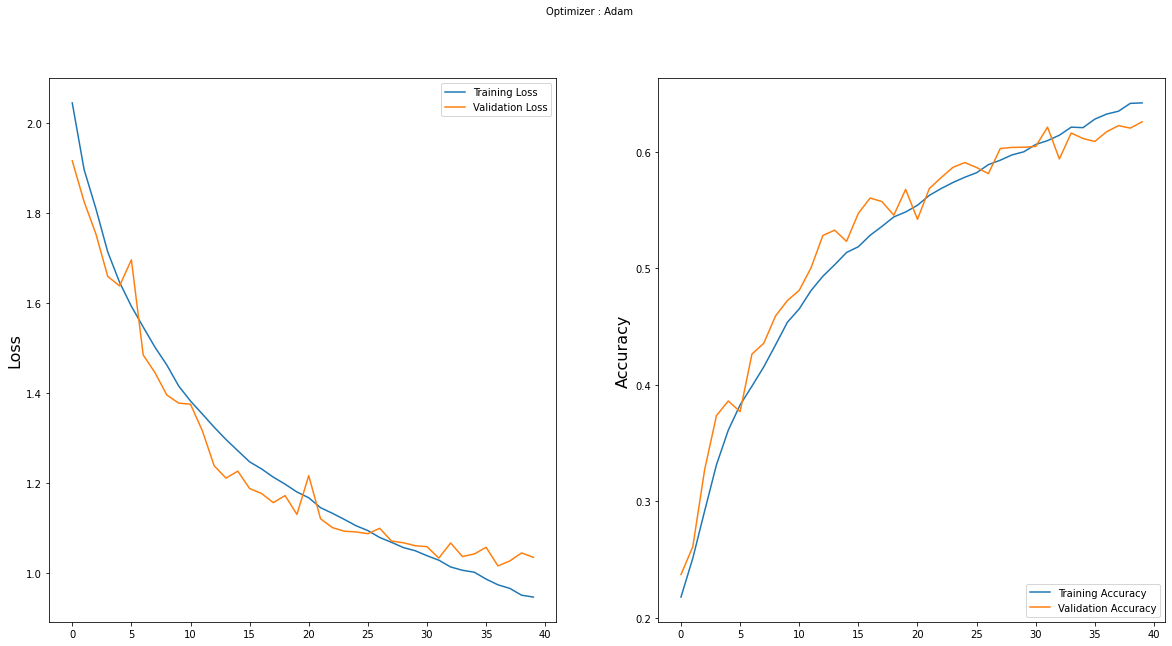

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()